In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# solution for relative imports in case realseries is not installed
sys.path.append('..')
from realseries.models.stl import STL
import warnings

warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

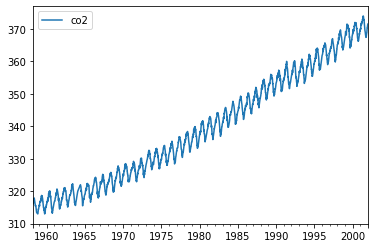

In [2]:
dataset = sm.datasets.co2.load()
start = dataset.data['index'][0]
index = pd.date_range(start=start, periods=len(dataset.data), freq='W-SAT')
obs = pd.DataFrame(dataset.data['co2'], index=index, columns=['co2'])
obs.head()
obs = (obs.resample('D').mean().interpolate('linear'))
obs.head(100)
obs.plot()

In [3]:
# For example, with daily observations and large annual cycles, `period=365`.
#  For hourly observations with large daily cycles, `period=24`.
# Some inspection, and trial and error may be helpful.
model = STL()
decomp = model.fit(obs, period=365)
short_obs = obs.head(10000)
short_decomp = model.fit(short_obs, period=365)
fcast = model.forecast(stl=short_decomp, steps=8000)
print(fcast.head())

                 drift
1985-08-14  345.985881
1985-08-15  345.989898
1985-08-16  345.993915
1985-08-17  345.997933
1985-08-18  346.001950


(15982, 1) (10000, 1) (10000, 1) (8000, 1)
            drift+seasonal
1985-08-14      344.855165
1985-08-15      344.800451
1985-08-16      344.736606
1985-08-17      344.683039
1985-08-18      344.632911
(15982, 1) (10000, 1) (10000, 1) (8000, 1)


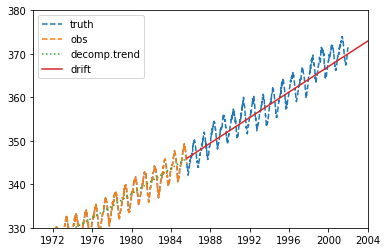

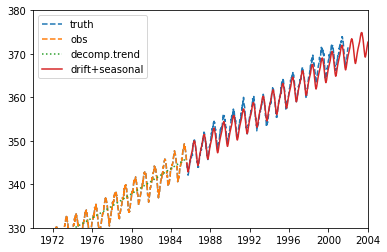

In [4]:
plt.figure()
plt.plot(obs, '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_decomp['trend'], ':', label='decomp.trend')
plt.plot(fcast, '-', label=fcast.columns[0])
plt.xlim('1970', '2004')
plt.ylim(330, 380)
plt.legend()
print(obs.shape,short_obs.shape,short_decomp['trend'].shape,fcast.shape)


fcast = model.forecast(short_decomp, steps=8000,seasonal=True)
print(fcast.head())
plt.figure()
plt.plot(obs, '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_decomp['trend'], ':', label='decomp.trend')
plt.plot(fcast, '-', label=fcast.columns[0])
plt.xlim('1970', '2004')
plt.ylim(330, 380)
plt.legend()
print(obs.shape,short_obs.shape,short_decomp['trend'].shape,fcast.shape)